<a href="https://colab.research.google.com/github/AdamStajer07/pytorchTutorial/blob/main/03_pytorch_tutorial_excersize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 Pytorch Tutorial Excersizes

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.5.0+cu121'

In [ ]:
weight = 0.9
bias = 0.3

start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias


In [ ]:
train_split = int(len(X)*0.8)
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]
len(X_train), len(X_test)

(80, 20)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions data")

  plt.legend(prop={"size": 14});

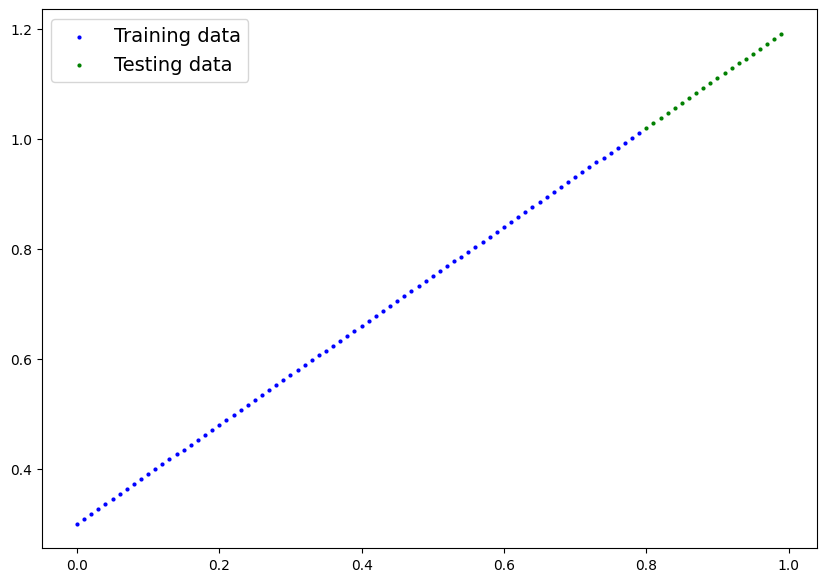

In [ ]:
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + bias

In [ ]:
torch.manual_seed(67)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([1.9416], requires_grad=True),
 Parameter containing:
 tensor([-1.3425], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([1.9416])), ('bias', tensor([-1.3425]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[1.8533],
        [1.8727],
        [1.8921],
        [1.9115],
        [1.9309],
        [1.9503],
        [1.9697],
        [1.9892],
        [2.0086],
        [2.0280],
        [2.0474],
        [2.0668],
        [2.0862],
        [2.1057],
        [2.1251],
        [2.1445],
        [2.1639],
        [2.1833],
        [2.2027],
        [2.2222]])

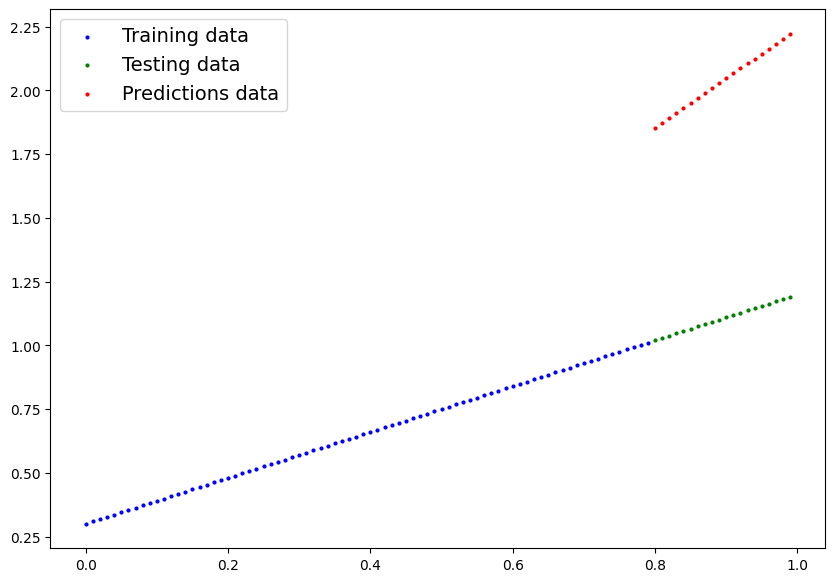

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
epochs = 300

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 20 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | loss: {loss}| test_loss: {test_loss}")

Epoch: 0 | loss: 0.41141924262046814| test_loss: 0.9286678433418274
Epoch: 20 | loss: 0.38021427392959595| test_loss: 0.8579627871513367
Epoch: 40 | loss: 0.349009245634079| test_loss: 0.7872578501701355
Epoch: 60 | loss: 0.3178042471408844| test_loss: 0.7165528535842896
Epoch: 80 | loss: 0.28659921884536743| test_loss: 0.6458477973937988
Epoch: 100 | loss: 0.25539425015449524| test_loss: 0.5751428008079529
Epoch: 120 | loss: 0.22418923676013947| test_loss: 0.5044378042221069
Epoch: 140 | loss: 0.1929842233657837| test_loss: 0.4337328374385834
Epoch: 160 | loss: 0.1617792397737503| test_loss: 0.36302781105041504
Epoch: 180 | loss: 0.13057425618171692| test_loss: 0.29232287406921387
Epoch: 200 | loss: 0.09936925023794174| test_loss: 0.22161784768104553
Epoch: 220 | loss: 0.06816424429416656| test_loss: 0.15091288089752197
Epoch: 240 | loss: 0.03695925325155258| test_loss: 0.08020786195993423
Epoch: 260 | loss: 0.005754253827035427| test_loss: 0.009502875618636608
Epoch: 280 | loss: 0.00

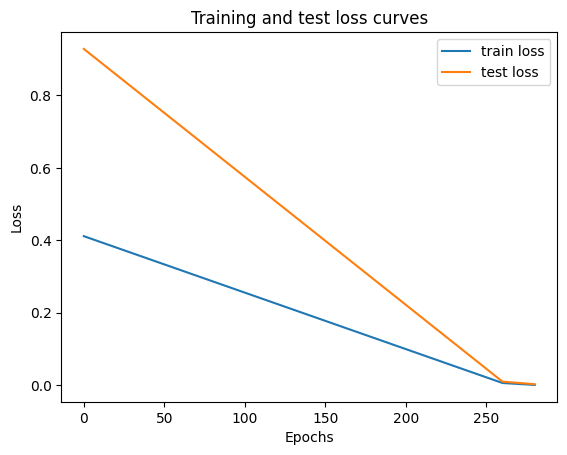

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="train loss")
plt.plot(epoch_count, test_loss_values, label="test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

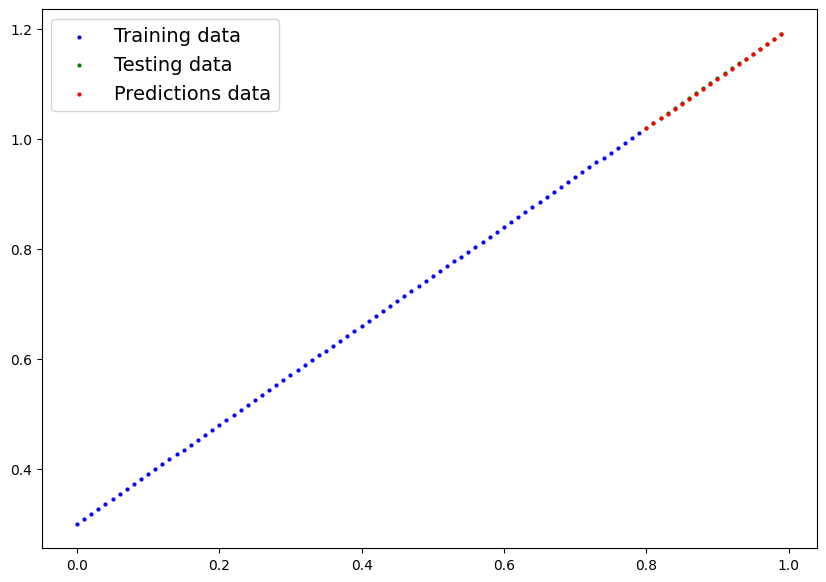

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "linear-regression-excersizes.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)